In image pyramids the image size is reduced by 1/4 resolution as we go up. So lowest level are highest resolution and highest level are lowest resolution.</br>
They are used in Image compression, Image Composition (means arranging elements/objects within it in a way prefered)

In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

original resolution (393, 265, 3)


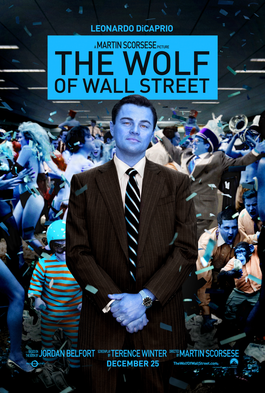

In [15]:
cvimg = cv2.imread("/content/image.png")
print("original resolution", cvimg.shape)
Image.fromarray(cvimg)

# 1. Gaussian Pyramids
They look blur as we move higher (reduce size).

Representational size


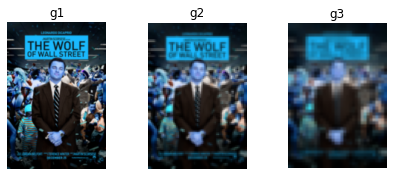

In [28]:
# calculate gaussian pyramid

g1 = cv2.pyrDown(cvimg)
g2 = cv2.pyrDown(g1)
g3 = cv2.pyrDown(g2)

print("Representational size")
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.tight_layout()
ax1.axis('off')
ax1.set_title("g1")
ax1.imshow(g1)

ax2.axis('off')
ax2.set_title("g2")
ax2.imshow(g2)

ax3.axis('off')
ax3.set_title("g3")
ax3.imshow(g3)

plt.show()

Here g1 is original image, g2, g3 are at higher level of pyramid.

Original size


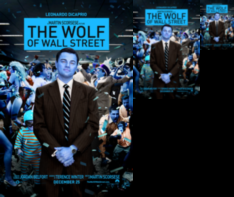

In [17]:
def show_image_pyramid(g1, g2, g3):
  h1, w1 = g1.shape[:2]
  h2, w2 = g2.shape[:2]
  h3, w3 = g3.shape[:2]

  fimg = np.zeros((max(h1, h2, h3), w1+w2+w3, 3), np.uint8)

  fimg[:h1, :w1] = g1
  fimg[:h2, w1:w1+w2] = g2
  fimg[:h3, w1+w2:w1+w2+w3] = g3
  return fimg

fimg = show_image_pyramid(g1, g2, g3)
print("Original size")
Image.fromarray(fimg)  

As shown here

# 2. Laplacian Pyramid
They look lke edges. Here most pixels are zero in histogram.

In [18]:
print(g1.shape, cv2.pyrUp(g2).shape)
print(g2.shape, cv2.pyrUp(g3).shape)

(197, 133, 3) (198, 134, 3)
(99, 67, 3) (100, 68, 3)


The cv2.pyrUp(g2) is not returning size of g1 because of which we can't substract them, there is one pixel difference between them, lets fix this first.

In [19]:
# increase pixel for h,w to match

def fix_size(g, offset, width_also=False): 
  if w_also:
    z1 = np.zeros((g.shape[0]+ offset, g.shape[1]+ offset, 3), np.uint8)
    z1 = np.zeros((g.shape[0]+ offset, g.shape[1]+ offset, 3), np.uint8)
  else:
    z1 = np.zeros((g.shape[0]+ offset, g.shape[1], 3), np.uint8)
  z1[:g.shape[0], :g.shape[1]] = g
  return z1

In [21]:
# calculate laplacian pyramid formula (L1 = g1 - EXPAND[g2])

L1 = fix_size(g1, 1, width_also=True) - cv2.pyrUp(g2)
L2 = fix_size(g2, 1, width_also=True) - cv2.pyrUp(g3)
L3 = g3

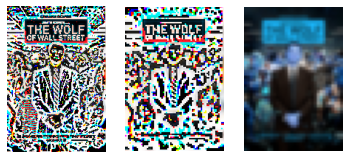

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(L1)
ax1.axis('off')
ax2.imshow(L2)
ax2.axis('off')
ax3.imshow(L3)
ax3.axis('off')
plt.show()

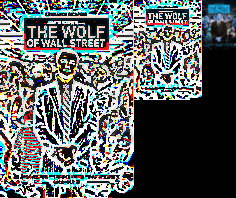

In [29]:
# show in their sizes

fimg = show_image_pyramid(L1, L2, L3)
Image.fromarray(fimg)

# 3. Reconstruct the image

In [30]:
# calculate gaussian pyramid first then apply formula (g2 = L2 - EXPAND[g3])

g3 = L3
g2 = L2 + cv2.pyrUp(g3) # pyrUp is used to expand to L2 size
g1 = fix_size(L1, 2, w_also=True) + cv2.pyrUp(g2)
re_img = cv2.pyrUp(g1) # restores to almost orginal size

Reconstructed Image size (400, 272, 3)


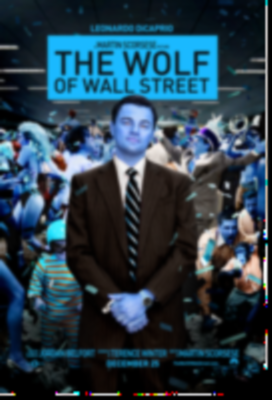

In [31]:
print("Reconstructed Image size", re_img.shape)
Image.fromarray(re_img)

Reconstructed Image is blur becuase pyrUp also applies blur. 